In [2]:
%matplotlib inline

morange = u'#ff7f0e'
mblue = u'#1f77b4'
mgreen = u'#2ca02c'
mred = u'#d62728'
mpurple = u'#9467bd'

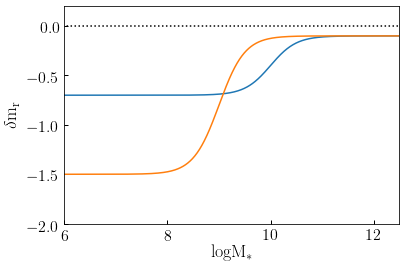

In [42]:
def sigmoid(x, x0=0, k=1, ymin=0, ymax=1):
    """
    """
    height_diff = ymax-ymin
    return ymin + height_diff/(1 + np.exp(-k*(x-x0)))

def delta_brightness(logsm, redshift, logsm_crit, low_mass_boost, high_mass_boost, k=4):
    return sigmoid(logsm, x0=logsm_crit, ymin=low_mass_boost, ymax=high_mass_boost, k=k)
    

npts = 1000
logsm = np.linspace(6, 12.5, npts)
_z = np.zeros_like(logsm)
y = sigmoid(logsm, x0=10, k=4, ymin=-0.7, ymax=-0.1)

logsm_crit=9
low_mass_boost=-1.5
high_mass_boost=-0.1

dmagr = delta_brightness(logsm, _z + 0.5, logsm_crit, low_mass_boost, high_mass_boost)

fig, ax = plt.subplots(1, 1)

__=ax.plot(logsm, y)
__=ax.plot(logsm, dmagr)

xlim = ax.set_xlim(6, 12.5)
ylim = ax.set_ylim(-2, 0.2)
__=ax.plot(np.linspace(0, 100, 100), np.zeros(100), ':', color='k')
xlabel = ax.set_xlabel(r'${\rm logM_{\ast}}$')
ylabel = ax.set_ylabel(r'${\rm \delta m_r}$')

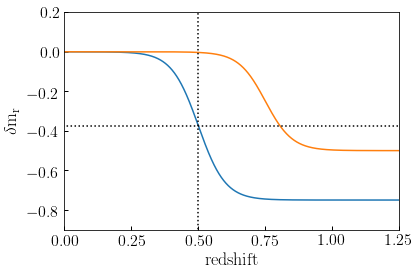

In [41]:
def sigmoid(x, x0=0, k=1, ymin=0, ymax=1):
    """
    """
    height_diff = ymax-ymin
    return ymin + height_diff/(1 + np.exp(-k*(x-x0)))

def magr_zevol(z, z_crit, dmagr_highz, k=20):
    return sigmoid(z, x0=z_crit, ymin=0, ymax=dmagr_highz, k=k)

npts= int(1e4)
zarr = np.linspace(0, 3, npts)
zz, dzz = 0.5, -0.75
dmag = magr_zevol(zarr, zz, dzz)
zz2, dzz2 = 0.75, -0.5
dmag2 = magr_zevol(zarr, zz2, dzz2)

fig, ax = plt.subplots(1, 1)

__=ax.plot(zarr, dmag)
__=ax.plot(zarr, dmag2)

__=ax.plot(np.zeros(100) + zz, np.linspace(-100, 100, 100), ':', color='k')
__=ax.plot(np.linspace(-100, 100, 100), np.zeros(100) + dzz/2., ':', color='k')

ylim = ax.set_ylim(-abs(1.2*dzz), 0.2)
xlim = ax.set_xlim(0, 1.25)
xlabel = ax.set_xlabel(r'${\rm redshift}$')
ylabel = ax.set_ylabel(r'${\rm \delta m_r}$')

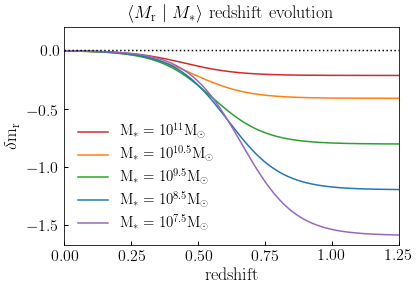

In [133]:
def sigmoid(x, x0=0, k=1, ymin=0, ymax=1):
    """
    """
    height_diff = ymax-ymin
    return ymin + height_diff/(1 + np.exp(-k*(x-x0)))


default_logsm_table = np.array((6, 7, 8, 9, 10, 11, 12)).astype('f4')

def delta_magr_highz_vs_mstar(
        logsm, delta_magr_highz_table=[-2, -2, -1.5, -1, -0.5, 0, 0], **kwargs):
    c2, c1, c0 = np.polyfit(default_logsm_table, delta_magr_highz_table, deg=2)
    return c0 + c1*logsm + c2*logsm**2
#     return np.interp(logsm, default_logsm_table, delta_magr_highz_table)

def z_crit_vs_mstar(
        logsm, z_crit_table=[0.7, 0.7, 0.65, 0.6, 0.5, 0.4, 0.4], **kwargs):
    c2, c1, c0 = np.polyfit(default_logsm_table, z_crit_table, deg=2)
    return c0 + c1*logsm + c2*logsm**2
#     return np.interp(logsm, default_logsm_table, z_crit_table)

def delta_magr_vs_redshift(z, z_crit, dmagr_highz, k=10, **kwargs):
    return sigmoid(z, x0=z_crit, ymin=0, ymax=dmagr_highz, k=k)

def delta_brightness(
    logsm, redshift, logsm_crit, low_mass_boost, high_mass_boost, k=4, **kwargs):
    return sigmoid(logsm, x0=logsm_crit, ymin=low_mass_boost, ymax=high_mass_boost, k=k)

def delta_magr_vs_mstar_redshift(logsm, redshift, dmin=-2.25, **kwargs):
    dmagr_highz = delta_magr_highz_vs_mstar(logsm, **kwargs)
    z_crit = z_crit_vs_mstar(logsm, **kwargs)
    delta_magr = delta_magr_vs_redshift(redshift, z_crit, dmagr_highz)
    delta_magr = np.where(delta_magr > 0, 0., delta_magr)
    delta_magr = np.where(delta_magr < dmin, dmin, delta_magr)
    return delta_magr 

ngals = int(1e4)
logsm_array = np.linspace(6, 12.5, ngals)
_z = np.zeros(ngals)
zarr = np.linspace(0, 1.5, ngals)

kwargs1 = dict()
dmag1a_vsz = delta_magr_vs_mstar_redshift(_z + 7.5, zarr, **kwargs1)
dmag1b_vsz = delta_magr_vs_mstar_redshift(_z + 8.5, zarr, **kwargs1)
dmag1c_vsz = delta_magr_vs_mstar_redshift(_z + 9.5, zarr, **kwargs1)
dmag1d_vsz = delta_magr_vs_mstar_redshift(_z + 10.5, zarr, **kwargs1)
dmag1e_vsz = delta_magr_vs_mstar_redshift(_z + 11.0, zarr, **kwargs1)

fig, ax = plt.subplots(1, 1)

__=ax.plot(zarr, dmag1e_vsz, label=r'${\rm M_{\ast} = 10^{11}M_{\odot}}$', color=mred)
__=ax.plot(zarr, dmag1d_vsz, label=r'${\rm M_{\ast} = 10^{10.5}M_{\odot}}$', color=morange)
__=ax.plot(zarr, dmag1c_vsz, label=r'${\rm M_{\ast} = 10^{9.5}M_{\odot}}$', color=mgreen)
__=ax.plot(zarr, dmag1b_vsz, label=r'${\rm M_{\ast} = 10^{8.5}M_{\odot}}$', color=mblue)
__=ax.plot(zarr, dmag1a_vsz, label=r'${\rm M_{\ast} = 10^{7.5}M_{\odot}}$', color=mpurple)

__=ax.plot(zarr, np.zeros_like(zarr), ':', color='k')

legend = ax.legend()
title = ax.set_title(r'$\langle M_{\rm r}\ \vert\ M_{\ast}\rangle\ {\rm redshift\ evolution}$')
xlabel = ax.set_xlabel(r'${\rm redshift}$')
ylabel = ax.set_ylabel(r'${\rm \delta m_r}$')

xlim = ax.set_xlim(0, 1.25)
ylim = ax.set_ylim(ymax=0.2)


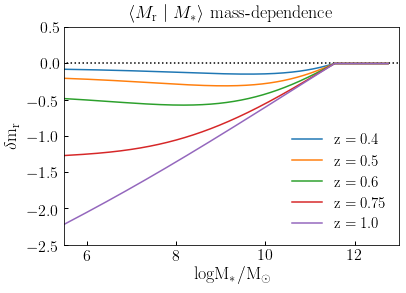

In [134]:
ngals = int(1e4)
logsm_array = np.linspace(6, 12.5, ngals)
_z = np.zeros(ngals)
zarr = np.linspace(0, 1.5, ngals)
logsm_arr = np.linspace(5.5, 12.75, ngals)

kwargs1 = dict()
dmag1a_vsm = delta_magr_vs_mstar_redshift(logsm_arr, _z + 0.4, **kwargs1)
dmag1b_vsm = delta_magr_vs_mstar_redshift(logsm_arr, _z + 0.5, **kwargs1)
dmag1c_vsm = delta_magr_vs_mstar_redshift(logsm_arr, _z + 0.6, **kwargs1)
dmag1d_vsm = delta_magr_vs_mstar_redshift(logsm_arr, _z + 0.75, **kwargs1)
dmag1e_vsm = delta_magr_vs_mstar_redshift(logsm_arr, _z + 1, **kwargs1)

fig, ax = plt.subplots(1, 1)

__=ax.plot(np.linspace(0, 100, 100), np.zeros(100), ':', color='k')
__=ax.plot(logsm_arr, dmag1a_vsm, label=r'${\rm z=0.4}$')
__=ax.plot(logsm_arr, dmag1b_vsm, label=r'${\rm z=0.5}$')
__=ax.plot(logsm_arr, dmag1c_vsm, label=r'${\rm z=0.6}$')
__=ax.plot(logsm_arr, dmag1d_vsm, label=r'${\rm z=0.75}$')
__=ax.plot(logsm_arr, dmag1e_vsm, label=r'${\rm z=1.0}$')
xlim = ax.set_xlim(5.5, 13.)
ylim = ax.set_ylim(-2.5, 0.5)

legend = ax.legend()
title = ax.set_title(
    r'$\langle M_{\rm r}\ \vert\ M_{\ast}\rangle\ {\rm mass}$-${\rm dependence}$')
xlabel = ax.set_xlabel(r'${\rm logM_{\ast}/M_{\odot}}$')
ylabel = ax.set_ylabel(r'${\rm \delta m_r}$')



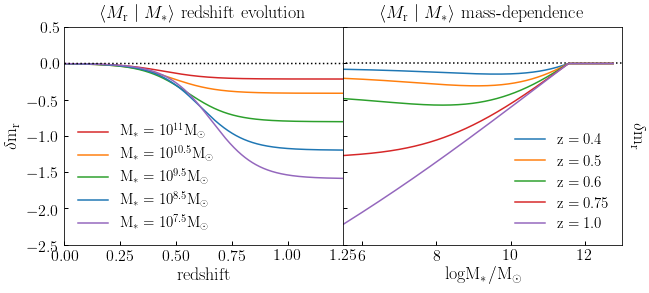

In [135]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4), sharey=True)
fig.subplots_adjust(wspace=0) 

__=ax1.plot(zarr, dmag1e_vsz, label=r'${\rm M_{\ast} = 10^{11}M_{\odot}}$', color=mred)
__=ax1.plot(zarr, dmag1d_vsz, label=r'${\rm M_{\ast} = 10^{10.5}M_{\odot}}$', color=morange)
__=ax1.plot(zarr, dmag1c_vsz, label=r'${\rm M_{\ast} = 10^{9.5}M_{\odot}}$', color=mgreen)
__=ax1.plot(zarr, dmag1b_vsz, label=r'${\rm M_{\ast} = 10^{8.5}M_{\odot}}$', color=mblue)
__=ax1.plot(zarr, dmag1a_vsz, label=r'${\rm M_{\ast} = 10^{7.5}M_{\odot}}$', color=mpurple)

__=ax1.plot(zarr, np.zeros_like(zarr), ':', color='k')

__=ax2.plot(np.linspace(0, 100, 100), np.zeros(100), ':', color='k')
__=ax2.plot(logsm_arr, dmag1a_vsm, label=r'${\rm z=0.4}$')
__=ax2.plot(logsm_arr, dmag1b_vsm, label=r'${\rm z=0.5}$')
__=ax2.plot(logsm_arr, dmag1c_vsm, label=r'${\rm z=0.6}$')
__=ax2.plot(logsm_arr, dmag1d_vsm, label=r'${\rm z=0.75}$')
__=ax2.plot(logsm_arr, dmag1e_vsm, label=r'${\rm z=1.0}$')

__=ax2.plot(zarr, np.zeros_like(zarr), ':', color='k')

title2 = ax2.set_title(
    r'$\langle M_{\rm r}\ \vert\ M_{\ast}\rangle\ {\rm mass}$-${\rm dependence}$')
xlabel2 = ax2.set_xlabel(r'${\rm logM_{\ast}/M_{\odot}}$')
ylabel2 = ax2.set_ylabel(r'${\rm \delta m_r}$', rotation=-90, labelpad=20)
__=ax2.yaxis.set_label_position("right")  #  y-labels on the right
                            


title = ax1.set_title(r'$\langle M_{\rm r}\ \vert\ M_{\ast}\rangle\ {\rm redshift\ evolution}$')
xlabel1 = ax1.set_xlabel(r'${\rm redshift}$')
ylabel1 = ax1.set_ylabel(r'${\rm \delta m_r}$')

legend1 = ax1.legend()
legend2 = ax2.legend()

xlim1 = ax1.set_xlim(0, 1.25)
ylim1 = ax1.set_ylim(ymax=0.2)
xlim2 = ax2.set_xlim(5.5, 13.)
ylim2 = ax2.set_ylim(-2.5, 0.5)


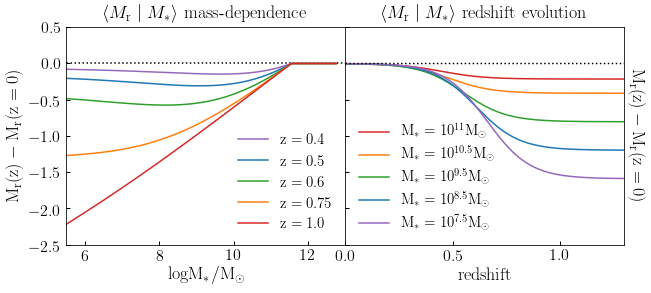

In [144]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4), sharey=True)
fig.subplots_adjust(wspace=0) 

__=ax2.plot(zarr, dmag1e_vsz, label=r'${\rm M_{\ast} = 10^{11}M_{\odot}}$', color=mred)
__=ax2.plot(zarr, dmag1d_vsz, label=r'${\rm M_{\ast} = 10^{10.5}M_{\odot}}$', color=morange)
__=ax2.plot(zarr, dmag1c_vsz, label=r'${\rm M_{\ast} = 10^{9.5}M_{\odot}}$', color=mgreen)
__=ax2.plot(zarr, dmag1b_vsz, label=r'${\rm M_{\ast} = 10^{8.5}M_{\odot}}$', color=mblue)
__=ax2.plot(zarr, dmag1a_vsz, label=r'${\rm M_{\ast} = 10^{7.5}M_{\odot}}$', color=mpurple)

__=ax2.plot(zarr, np.zeros_like(zarr), ':', color='k')

__=ax1.plot(np.linspace(0, 100, 100), np.zeros(100), ':', color='k')
__=ax1.plot(logsm_arr, dmag1a_vsm, label=r'${\rm z=0.4}$', color=mpurple)
__=ax1.plot(logsm_arr, dmag1b_vsm, label=r'${\rm z=0.5}$', color=mblue)
__=ax1.plot(logsm_arr, dmag1c_vsm, label=r'${\rm z=0.6}$', color=mgreen)
__=ax1.plot(logsm_arr, dmag1d_vsm, label=r'${\rm z=0.75}$', color=morange)
__=ax1.plot(logsm_arr, dmag1e_vsm, label=r'${\rm z=1.0}$', color=mred)

__=ax1.plot(zarr, np.zeros_like(zarr), ':', color='k')

title1 = ax1.set_title(
    r'$\langle M_{\rm r}\ \vert\ M_{\ast}\rangle\ {\rm mass}$-${\rm dependence}$')
title2 = ax2.set_title(r'$\langle M_{\rm r}\ \vert\ M_{\ast}\rangle\ {\rm redshift\ evolution}$')

xlabel2 = ax1.set_xlabel(r'${\rm logM_{\ast}/M_{\odot}}$')
xlabel1 = ax2.set_xlabel(r'${\rm redshift}$')

ylabel1 = ax1.set_ylabel(r'${\rm M_r(z) - M_r(z=0)}$')
ylabel2 = ax2.set_ylabel(r'${\rm M_r(z) - M_r(z=0)}$', rotation=-90, labelpad=20)
__=ax2.yaxis.set_label_position("right")  
                            

legend1 = ax2.legend()
legend2 = ax1.legend()

xlim1 = ax2.set_xlim(0, 1.3)
ylim1 = ax2.set_ylim(ymax=0.2)
xlim2 = ax1.set_xlim(5.5, 13.)
ylim2 = ax1.set_ylim(-2.5, 0.5)

figname = 'magr_mstar_evolution_model.pdf'
fig.savefig(figname, bbox_extra_artists=[xlabel1, ylabel1], bbox_inches='tight')